# **PCA: USA Education Institute feature engineering Case study**

**Context**
In this case study, we will use the Education dataset which contains information on educational
institutes in the USA. The data has various attributes about the number of applications received,
enrolments, faculty education, financial aspects, and the graduation rate of each institute.

**Objective**
The objective of this problem is to reduce the number of features by using dimensionality
reduction techniques such as high correlation filter and PCA, and extract insights about the data.

**Dataset**

The Education dataset contains information on various colleges in the USA. It contains the following features:

1. Names: Names of various universities and colleges
2. Apps: The number of applications received
3. Accept: The number of applications accepted
4. Enroll: The number of new students enrolled
5. Top10perc: The percentage of new students from the top 10% of Higher Secondary class
6. Top25perc: The percentage of new students from the top 25% of Higher Secondary class
7. F_Undergrad: The number of full-time undergraduate students
8. P_Undergrad: The number of part-time undergraduate students

9. Outstate: The number of students for whom the particular college or university is out-of-
state tuition

10. Room_Board: The cost of room and board
11. Books: The estimated cost of books for a student
12. Personal: The estimated personal spending for a student
13. PhD: The percentage of faculties with a Ph.D.
14. Terminal: The percentage of faculties with a terminal degree
15. S_F_Ratio: Student/faculty ratio
16. perc_alumni: Percentage of alumni who donate
17. Expend: The instructional expenditure per student
18. Grad_Rate: Graduation rate

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_csv("/content/drive/MyDrive/Predictive Analysis/Practical5/Copy of usa_education_inst_data.csv")
df = data.copy()
print(df.head())

                          Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F_Undergrad  P_Undergrad  Outstate  Room_Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S_F_Ratio  perc_alumni  Expend  Grad_Rate  
0        78      

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

18 Coloumns in total. Name is categorical data and S_F_Ratio is a float value. Rest all coloumns are numerical values with 777 rows.

In [12]:
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F_Undergrad    0
P_Undergrad    0
Outstate       0
Room_Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S_F_Ratio      0
perc_alumni    0
Expend         0
Grad_Rate      0
dtype: int64


No missing values in this dataset.

In [10]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# **Univariate Analysis**

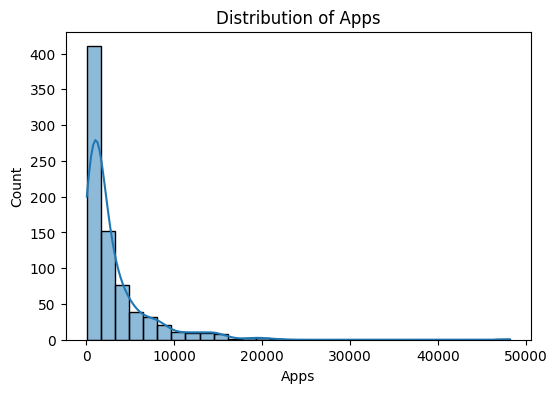

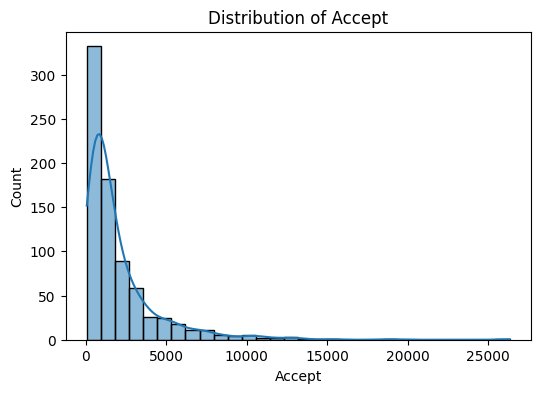

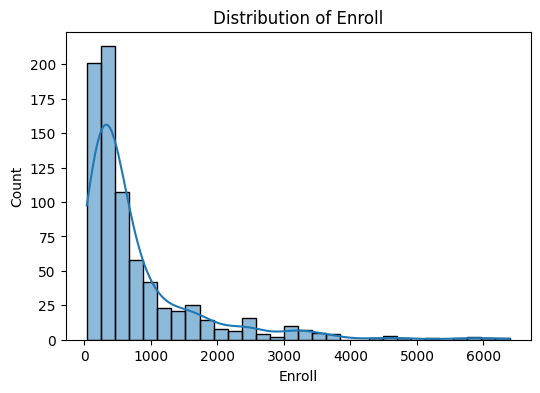

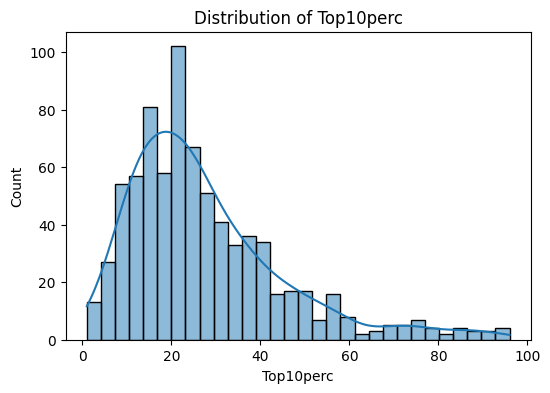

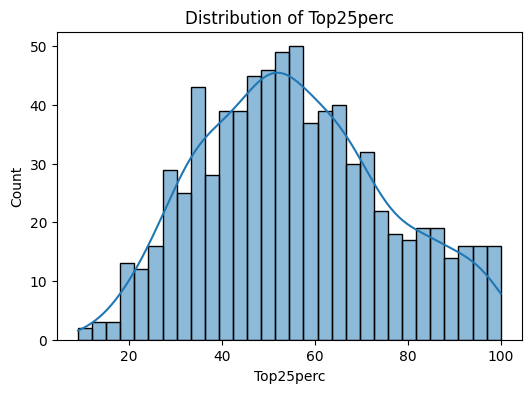

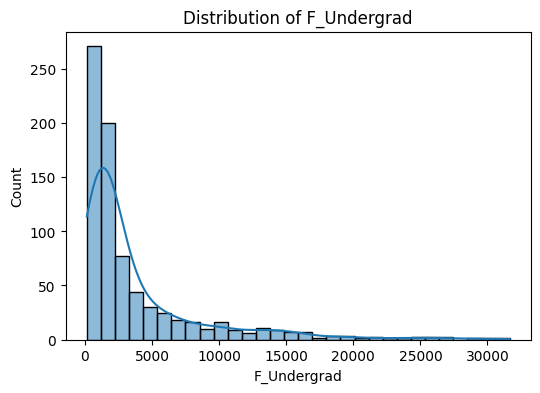

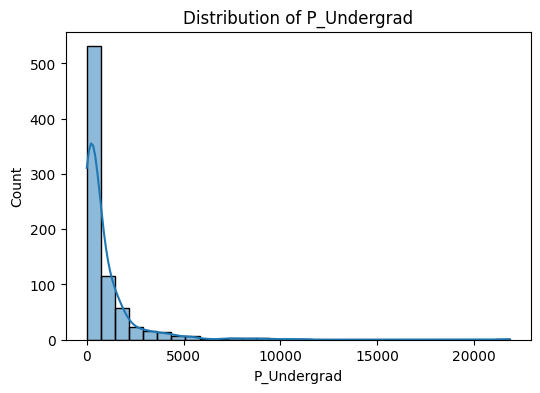

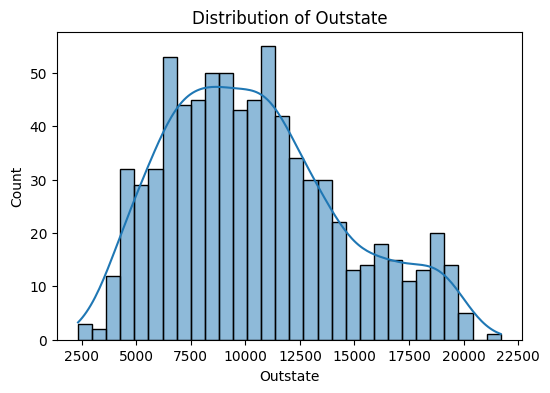

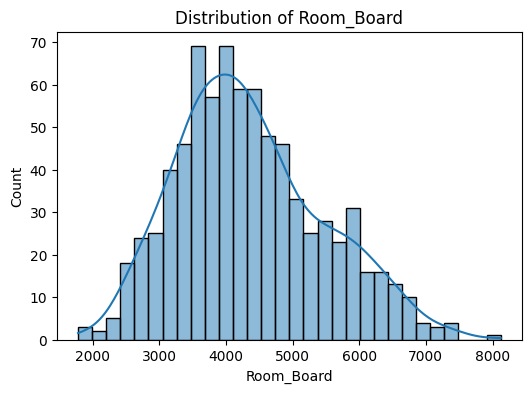

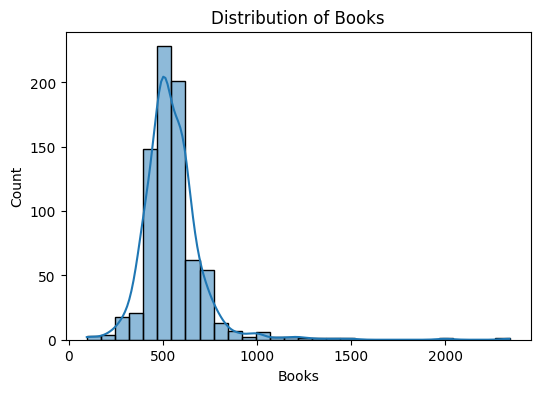

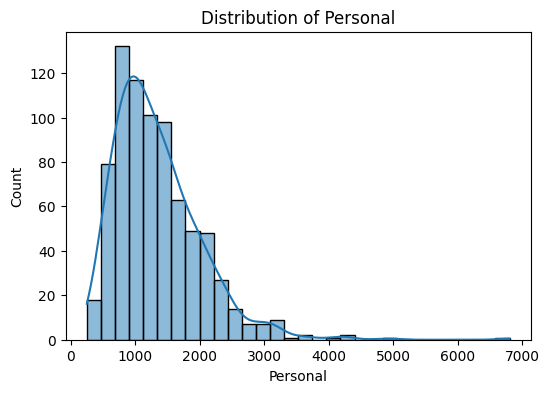

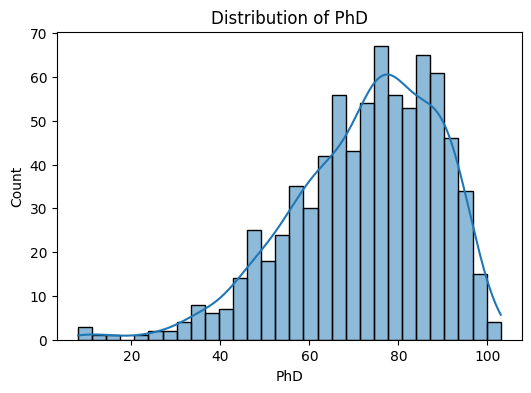

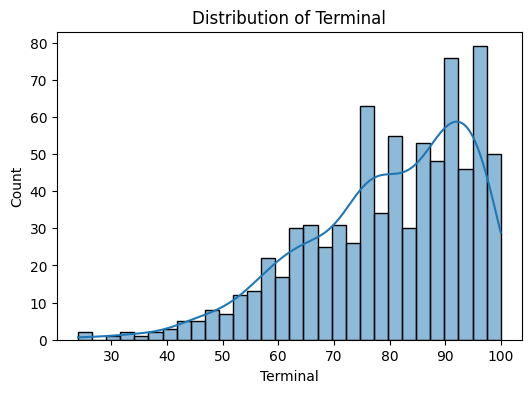

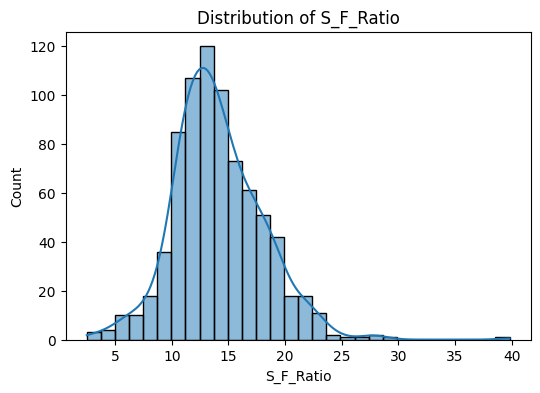

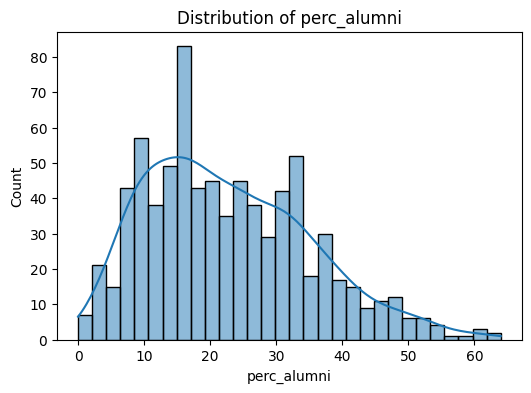

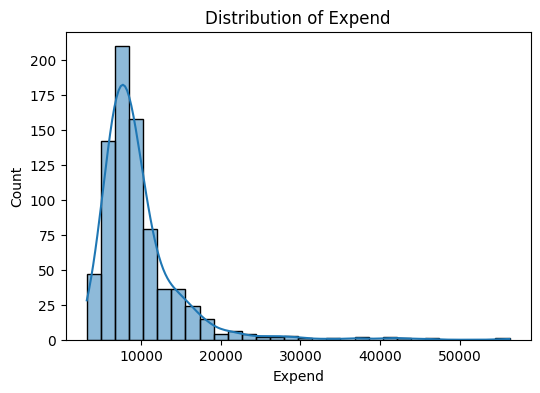

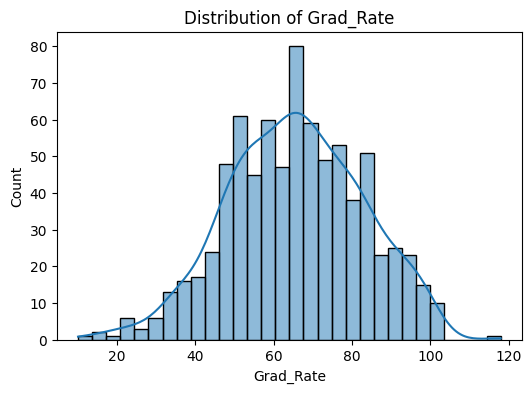

In [13]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


# **Data Preprocessing**

In [28]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F_Undergrad  777 non-null    int64  
 6   P_Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room_Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S_F_Ratio    777 non-null    float64
 14  perc_alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


Dropping the non-numeric colomns: Name

In [30]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)
scaled_df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


Scalling the data.

# **Data Correlation**

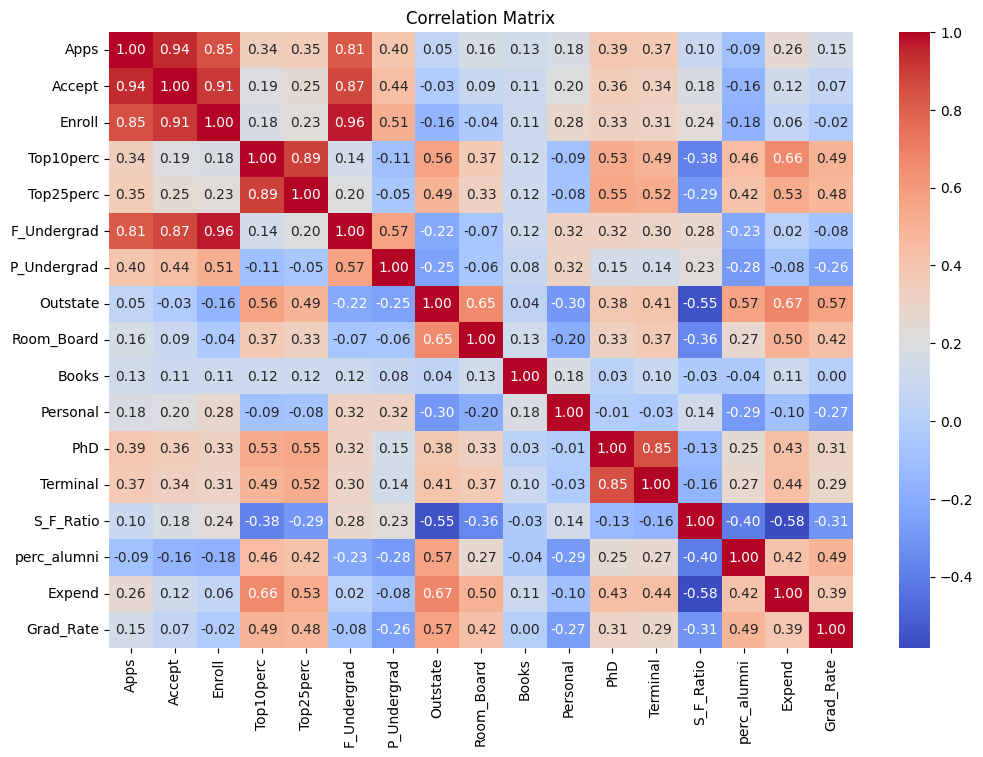

In [20]:
corr_matrix = scaled_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Some coloumns are highly related,i.e. Accept & Apps, Enroll & Accept, Enroll & F_Undergrad

# **Performing PCA**

In [22]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)


Applying PCA in the scalled data.

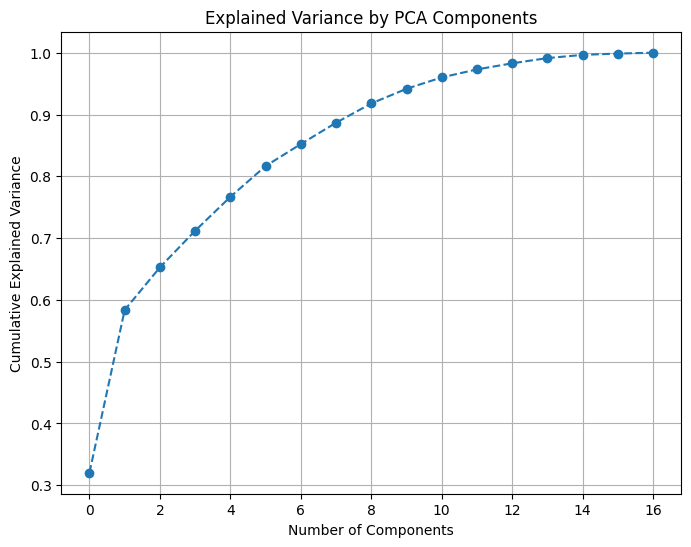

In [23]:
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()


Ploting the cumulative explained variance to determine the number of components to retain. This shows the features against thier explained variance.

In [24]:
n_components = np.argmax(np.cumsum(explained_variance) >= 0.90) + 1
print(f"Number of components explaining 90% variance: {n_components}")

pca = PCA(n_components=n_components)
pca_data_reduced = pca.fit_transform(scaled_data)


Number of components explaining 90% variance: 9


With the threshold of 90% only 9 features qualified having maximum explained variance.

In [25]:
pca_df = pd.DataFrame(pca_data_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
print(pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.592855  0.767334 -0.101074  0.921749 -0.743975 -0.298306  0.638443   
1 -2.192402 -0.578830  2.278798 -3.588918  1.059997 -0.177137  0.236753   
2 -1.430964 -1.092819 -0.438093 -0.677241 -0.369613 -0.960592 -0.248276   
3  2.855557 -2.630612  0.141722  1.295486 -0.183837 -1.059508 -1.249356   
4 -2.212008  0.021631  2.387030  1.114538  0.684451  0.004918 -2.159220   

        PC8       PC9  
0 -0.879386  0.093084  
1  0.046925  1.113780  
2  0.308740 -0.105452  
3 -0.147694  0.378997  
4 -0.624413 -0.160383  


In [26]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=df_numeric.columns)
print(loadings)


                  PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092 -0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249 -0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986 -0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056  0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148  0.109767 -0.426534  0.033092   
F_Undergrad  0.154641  0.417674 -0.061393 -0.100412 -0.043454 -0.043454   
P_Undergrad  0.026443  0.315088  0.139682  0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599 -0.131291  0.222532 -0.030000   
Room_Board   0.249030 -0.137809  0.148967 -0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412 -0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721  0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028  0.534725  0.140166  0.091256   
Terminal     0.317056  0.

This explains the contribution of the original features in the 9 new features after PCA. PCA 1 is highly influenced by Top10perc, Top25perc, PHD, Terminal and Expend.